# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/4

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
#key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


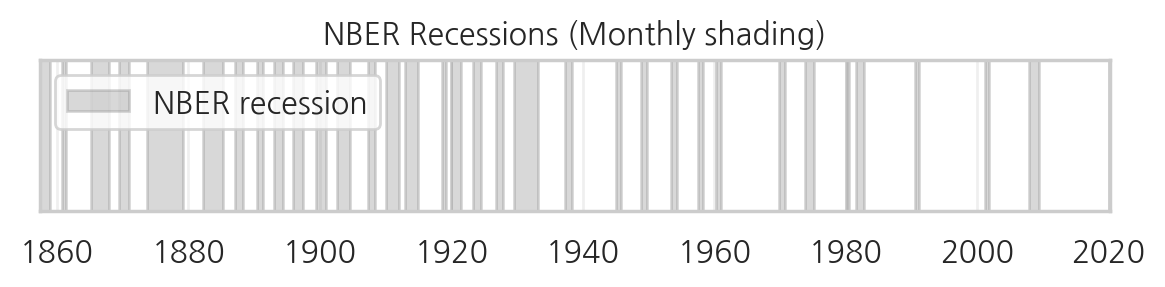

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 기초 개념들

- pv (Present Value) = how much my money is worth today
- fv (Future Value) = how much my money is worth in the future

- 단리 (simple interest): 원금에만 이자가 붙음, $fv = pv + pv \times r \times n = pv\times(1+r n)$
- 복리 (compound interest): 이자에도 이자가 붙음, $fv = pv \times (1+r)^n$



In [4]:
pv = 1000 # principal
n = 12.   # number of periods
r = 0.05  # interest rate

# simple interest
pv1 = pv*(1+n*r)
print(f'단리의 경우 ${pv1:.1f}를 받습니다.')

# compound interest
pv2 = pv*(1+r)**n
print(f'복리의 경우 ${pv2:.1f}를 받습니다.')

단리의 경우 $1600.0를 받습니다.
복리의 경우 $1795.9를 받습니다.


## numpy_financial의 기능


In [5]:
!pip -q install numpy-financial
import numpy_financial as npf


### npf.fv (fv 구하기)

$1,000을 10년간 투자하는데 연간 이자율은 5%인 상황에서 10년 후 내 자산은 얼마일까?
1. 이자가 연 단위로 지급되는 경우
2. 이자가 월 단위로 지급되는 경우
3. 이자가 일 단위로 지급되는 경우

**By convention, we put (-) on cash flows out.**

In [6]:
# using annual compounding frequency
fv = npf.fv(rate = 0.05, nper = 10, pmt = 0, pv = -1000)
print(f'이자가 연 단위로 지급되는 경우: {fv:.2f}')

# using monthly compounding frequency
fv = npf.fv(rate = 0.05/12, nper = 12*10, pmt = 0, pv = -1000)
print(f'이자가 월 단위로 지급되는 경우: {fv:.2f}')


# using daily compounding frequency
fv = npf.fv(rate = 0.05/365, nper = 365*10, pmt = 0, pv = -1000)
print(f'이자가 일 단위로 지급되는 경우: {fv:.2f}')

이자가 연 단위로 지급되는 경우: 1628.89
이자가 월 단위로 지급되는 경우: 1647.01
이자가 일 단위로 지급되는 경우: 1648.66


$1,000을 투자하고 매년 $100씩 추가하는 경우 연간 이자율이 5%인 상황에서 10년 후 내 자산은 얼마일까?

In [7]:
fv = npf.fv(rate = 0.05, nper = 10, pmt = -100, pv = -1000)
print(f'{fv:.2f}')

2886.68


### npf.nper (pv가 fv가 되는데 걸리는 시간)

In [8]:
# 연이율 5%, 매달 200만원씩 저축해서 1억을 만드는데 걸리는 시간 (이자는 매월 붙는 경우)
number_period = npf.nper(rate=0.05/12, pmt=-200, pv=0, fv=10000)
print(f'1억원을 모으는데 걸리는 시간은 총 {number_period:.1f}개월임.')

1억원을 모으는데 걸리는 시간은 총 45.5개월임.


### npf.pmt (pv가 fv가 되기 위해 매기 지급(저축)해야 하는 액수)

In [9]:
# 연이율 5%, 4년 동안 1억을 저축하기 위해 매월 얼마나 저축해야 하는가? (이자는 매월 붙는 경우)
monthly_pmt = npf.pmt(rate=0.05/12, nper=4*12, pv=0,fv=10000)
print(f'1억원을 모으는데 4년 동안 매달 {-monthly_pmt:.1f}만원씩 저축해야 함.')

1억원을 모으는데 4년 동안 매달 188.6만원씩 저축해야 함.


In [10]:
# 연이율 5%, 만기 4년으로 1억을 빌렸는데 매달 얼마씩 갚아야 하는가?   (이자는 매월 붙는 경우)
monthly_pmt = npf.pmt(rate=0.05/12, nper=4*12, pv=10000,fv=0)
print(f'1억원 대출을 갚기 위해 4년 동안 매달 {-monthly_pmt:.1f}만원씩 납부해야 함.')

1억원 대출을 갚기 위해 4년 동안 매달 230.3만원씩 납부해야 함.


### npf.rate (pv가 fv가 되기 위해 필요한 이자율)

In [11]:
# 4년 동안 매달 200만원씩 저축해서 1억을 모으기 위해서는 이자율이 얼마여야 하는가? (이자는 매월 붙는 경우)
monthly_rate = npf.rate(nper=4*12, pmt = -200, pv=0, fv=10000)
print(f'4년 동안 매달 200만원씩 납부해서 1억원을 모으려면 연이율 {12*100*monthly_rate:.3f}%이어야 함.')

4년 동안 매달 200만원씩 납부해서 1억원을 모으려면 연이율 2.072%이어야 함.


### npf.pv (pv 구하기)

In [12]:
# 5% 연간 이자율, 10년 뒤 1천만원을 모으기 위해서 현재 얼마를 투자해야 하는가?
pv = npf.pv(rate=0.05, nper=10, pmt= 0, fv=1000)
print(f'10년 뒤 1천만원을 모으기 위해서는 현재 {-pv:.1f}만원을 투자해야 함')

10년 뒤 1천만원을 모으기 위해서는 현재 613.9만원을 투자해야 함


## Bond Pricing


### zero-coupon bond

- npf.pv를 이용해서 구할 수 있음

In [13]:
# 액면가 $1,000, 3년 만기 채권, 5% 연간 이자율인 경우 채권의 가격은?
price = npf.pv(rate=0.05, nper=3, pmt=0, fv=1000)
print(f'채권 가격은 ${-price:.1f}임')

채권 가격은 $863.8임


### coupon bond

- coupon rate = 8%
- semi-annual coupon payment
- interest rate = 5%
- maturity = 10 years
- par value = $1,000

In [14]:
coupon_rate = 0.08  # 이표율
i = 0.05            # 시장 이자율 또는 할인율
n = 2               # 1년에 이표가 지급되는 횟수
maturity = 10       # 만기
facevalue = 1000    # 액면가

price = npf.pv(rate=i/n, nper = n*maturity, pmt=facevalue*(coupon_rate/n), fv=1000)
print(f'채권 가격 = {-price:.2f}만원')

채권 가격 = 1233.84만원


In [15]:
# 무이표채(zero-coupon bond)의 경우
price_discount = npf.pv(rate=i, nper = maturity, pmt=0, fv=1000)
print(f'무이표채 가격 = {-price_discount:.2f}만원')

무이표채 가격 = 613.91만원


In [16]:
# 위의 식 확인
print(f'{1000/((1+0.05)**10):.2f}')

613.91


## 채권 가격과 이자율의 관계

In [17]:
price_interest = []
int_rate = np.arange(1,21,1)

for irate in int_rate:
  irate = irate/100
  price = -npf.pv(rate=irate/n, nper = n*maturity, pmt=facevalue*(coupon_rate/n), fv=1000)
  price_interest.append(price)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bond_price_interest.png


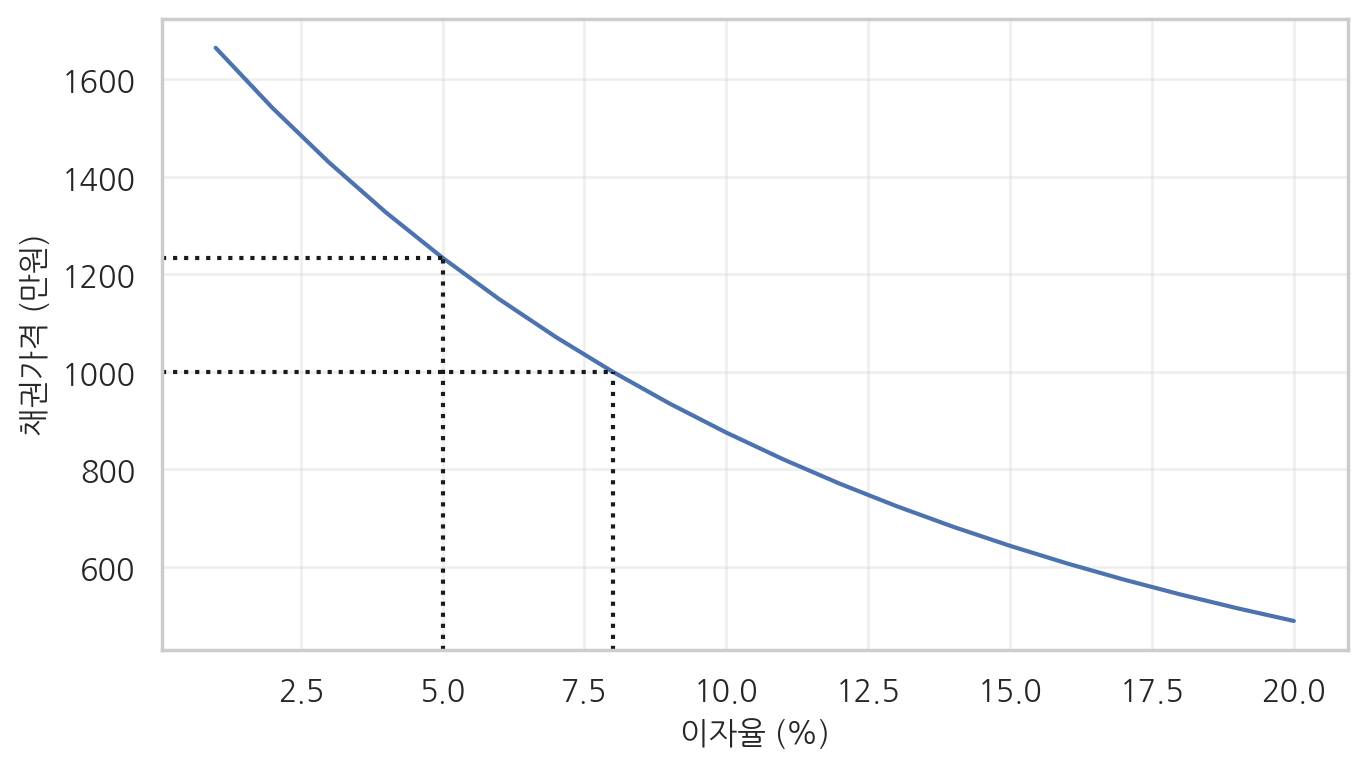

In [18]:
plt.figure(figsize=(7, 4))

plt.plot(int_rate, price_interest)
plt.xlabel('이자율 (%)', fontsize=11)
plt.ylabel('채권가격 (만원)', fontsize=11)

plt.axhline(y=1233.84, xmax=0.24, color='k', linestyle='dotted')
plt.axhline(y=1000, xmax=0.38, color='k', linestyle='dotted')

plt.axvline(x=5, ymax=0.62, color='k', linestyle='dotted')
plt.axvline(x=8, ymax=0.44, color='k', linestyle='dotted')

save_fig('bond_price_interest')
plt.show()


## 채권가격, 이자율, 만기사이관계

In [19]:
coupon_rate = 0.05
i = 0.05
n = 2
maturity = 30
facevalue = 1000

maturity = [1, 5, 10, 20, 30]
mkt_rate = [0.01, 0.03, 0.05, 0.07, 0.09]

bond_price = []

for m in maturity:
    for i in mkt_rate:
      price = npf.pv(rate=i/2, nper = n*m, pmt=facevalue*(coupon_rate/n),fv=1000)
      bond_price.append(-price)

In [20]:
bond_price = pd.DataFrame(np.reshape(bond_price, (5,5)), columns = [mkt_rate], index=[maturity])
pd.options.display.float_format = '{:.2f}'.format
bond_price

,0.01,0.03,0.05,0.07,0.09
1,1039.70,1019.56,1000.00,981.00,962.55
5,1194.61,1092.22,1000.00,916.83,841.75
10,1379.75,1171.69,1000.00,857.88,739.84
20,1723.44,1299.16,1000.00,786.45,631.97
30,2034.51,1393.80,1000.00,750.55,587.24


In [21]:
# source: https://colab.research.google.com/drive/1Iq10lHznMngg1-Uoo-QtpTPii1JDYSQA?usp=sharing

# Pandas DataFrame을 latex table 형태로 출력하는 라이브러리
!pip install -q latextable

from tabulate import tabulate
from texttable import Texttable

import latextable

print('\nTabulate Latex:')
print(tabulate(bond_price, tablefmt='latex'))


Tabulate Latex:
\begin{tabular}{lrrrrr}
\hline
 (1,)  & 1039.7  & 1019.56 & 1000 & 981.003 & 962.547 \\
 (5,)  & 1194.61 & 1092.22 & 1000 & 916.834 & 841.746 \\
 (10,) & 1379.75 & 1171.69 & 1000 & 857.876 & 739.841 \\
 (20,) & 1723.44 & 1299.16 & 1000 & 786.449 & 631.968 \\
 (30,) & 2034.51 & 1393.8  & 1000 & 750.553 & 587.24  \\
\hline
\end{tabular}


## YTM

In [22]:
coupon_rate = 0.08
n = 2
maturity = 10
facevalue = 1000
price = 1233.84

ytm = npf.rate(nper=n*maturity, pmt = facevalue*(coupon_rate/n), pv=-price, fv=1000)
print(f'6개월 yield =  {100*ytm:.2f}%')
print(f'annualized ytm ("bond equivalent yields") = {2*100*ytm:.2f}%')
print(f'effective ytm = {100*((1+ytm)**2-1):.2f}%')

6개월 yield =  2.50%
annualized ytm ("bond equivalent yields") = 5.00%
effective ytm = 5.06%


In [23]:
i = ytm*2

price  = npf.pv(rate = i/2, nper=n*maturity, pmt = facevalue*(coupon_rate/n), fv=1000)
print(f"bond price is ${-price:.2f}")

bond price is $1233.84


In [24]:
print(f'경상수익률(current yield)= {-100*facevalue*coupon_rate/price:.2f}%')

경상수익률(current yield)= 6.48%


### 할증채권(premium bond), 할인채권(discount bond)

- 할증채권: 액면가보다 높은 가격에 거래되는 채권
- 할인채권: 액면가보다 낮은 가격에 거래되는 채권

In [25]:
coupon_rate1 = 0.08
coupon_rate2 = 0.02
i = 0.05
n = 2
facevalue = 1000
maturity = 30

maturities1 = np.arange(1,maturity+1,1)
maturities2 = 30-maturities1

price1 = -npf.pv(rate = i/2, nper=n*maturities2, pmt = facevalue*(coupon_rate1/n), fv=1000)
price2 = -npf.pv(rate = i/2, nper=n*maturities2, pmt = facevalue*(coupon_rate2/n), fv=1000)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bond_premium_discount.png


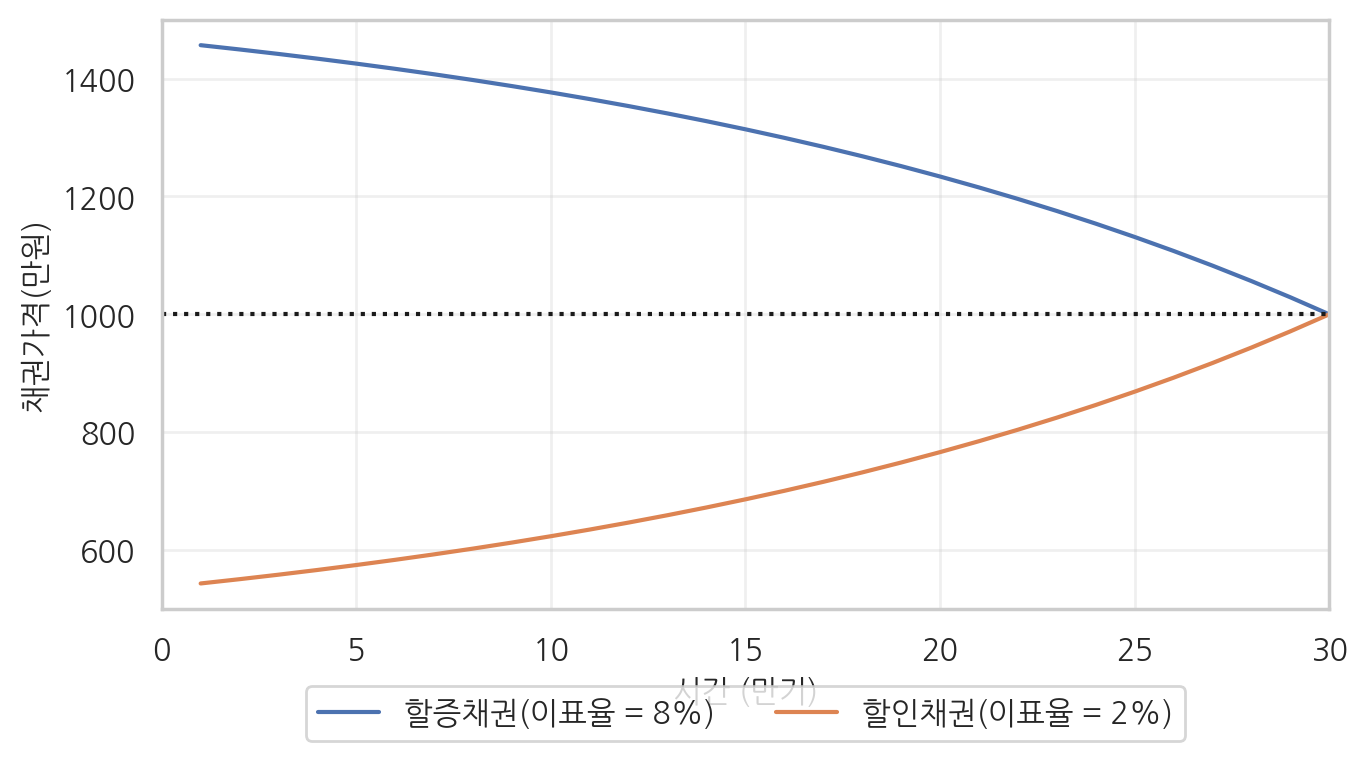

In [26]:
plt.figure(figsize=(7, 4))

plt.plot(maturities1, price1, label='할증채권(이표율 = 8%)')
plt.plot(maturities1, price2, label='할인채권(이표율 = 2%)')
plt.axhline(y=1000, color='k', linestyle='dotted')

plt.xlabel('시간 (만기)', fontsize=11)
plt.ylabel('채권가격(만원)',fontsize=11)
plt.axis([0, 30, 500, 1500])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

save_fig('bond_premium_discount')

plt.show()

## 금리의 차이가 주는 정보

In [27]:
# 20-Year Treasury Constant Maturity Rate (DGS20)
# 20-Year Treasury Inflation-Indexed Security, Constant Maturity (DFII20)
# Moody's Seasoned Aaa Corporate Bond Yield (DAAA)
# Moody's Seasoned Baa Corporate Bond Yield (DBAA)

var_list = ['DGS20','DFII20','DAAA', 'DBAA']
start = date(2003,1,1)
end = date(2024,5,1)

df = pdr.get_data_fred(var_list, start=start, end=end)
df = df.resample('M').mean()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bond_20yrs.png


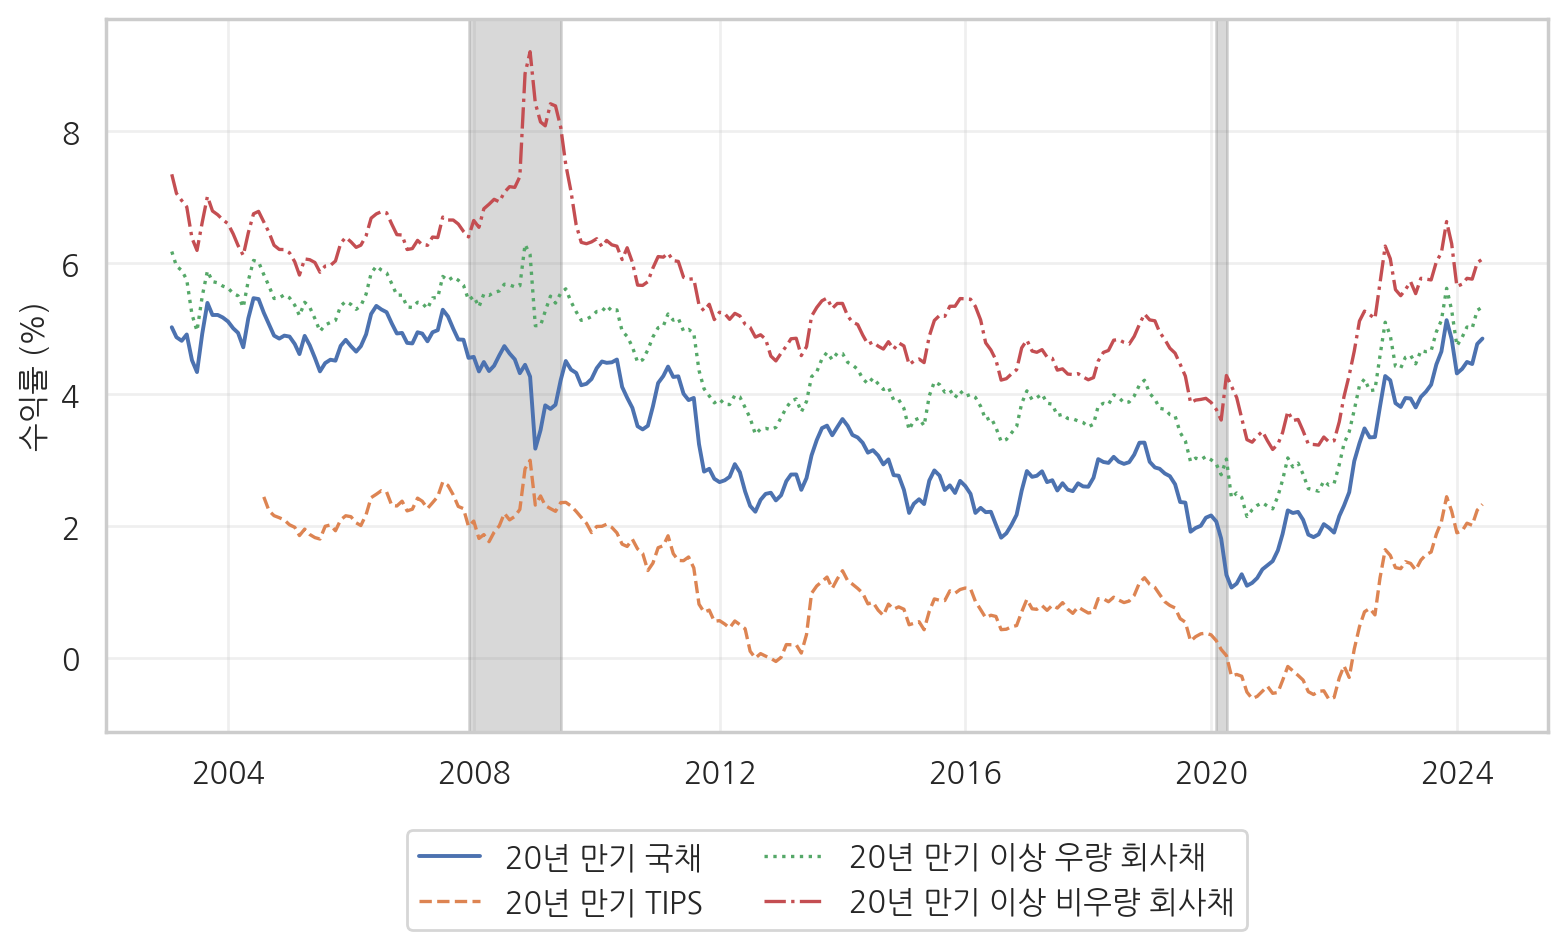

In [28]:
fig, ax = plt.subplots(figsize=(8,5))

# -----------------------------
# Lines
# -----------------------------
ax.plot(df['DGS20'],
        label='20년 만기 국채',
        linewidth=1.4)

ax.plot(df['DFII20'],
        label='20년 만기 TIPS',
        linestyle='dashed',
        linewidth=1.2)

ax.plot(df['DAAA'],
        label='20년 만기 이상 우량 회사채',
        linestyle='dotted',
        linewidth=1.2)

ax.plot(df['DBAA'],
        label='20년 만기 이상 비우량 회사채',
        linestyle='dashdot',
        linewidth=1.2)

# -----------------------------
# Recession shading
# -----------------------------
plot_nber_recession(ax, NBERm)

# -----------------------------
# Formatting
# -----------------------------
ax.set_ylabel('수익률 (%)', fontsize=11)
ax.set_xlabel('')

ax.legend(loc='lower center',
          bbox_to_anchor=(0.5, -0.3),
          ncol=2,
          fontsize=11)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.0f}')
)

ax.grid(True)
ax.margins(x=0)

save_fig('bond_20yrs')
plt.show()

### 안전자산 선호현상(flight to quality): 신용스프레드

In [29]:
# Moody's Seasoned Aaa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity (AAA10Y)
# Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity (BAA10Y)

var_list = ['AAA10Y','BAA10Y']
start = date(1990,1,1)
end = date(2024,5,1)

spread = pdr.get_data_fred(var_list, start=start, end=end)
spread = spread.resample('M').mean()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/credit_spread_us.png


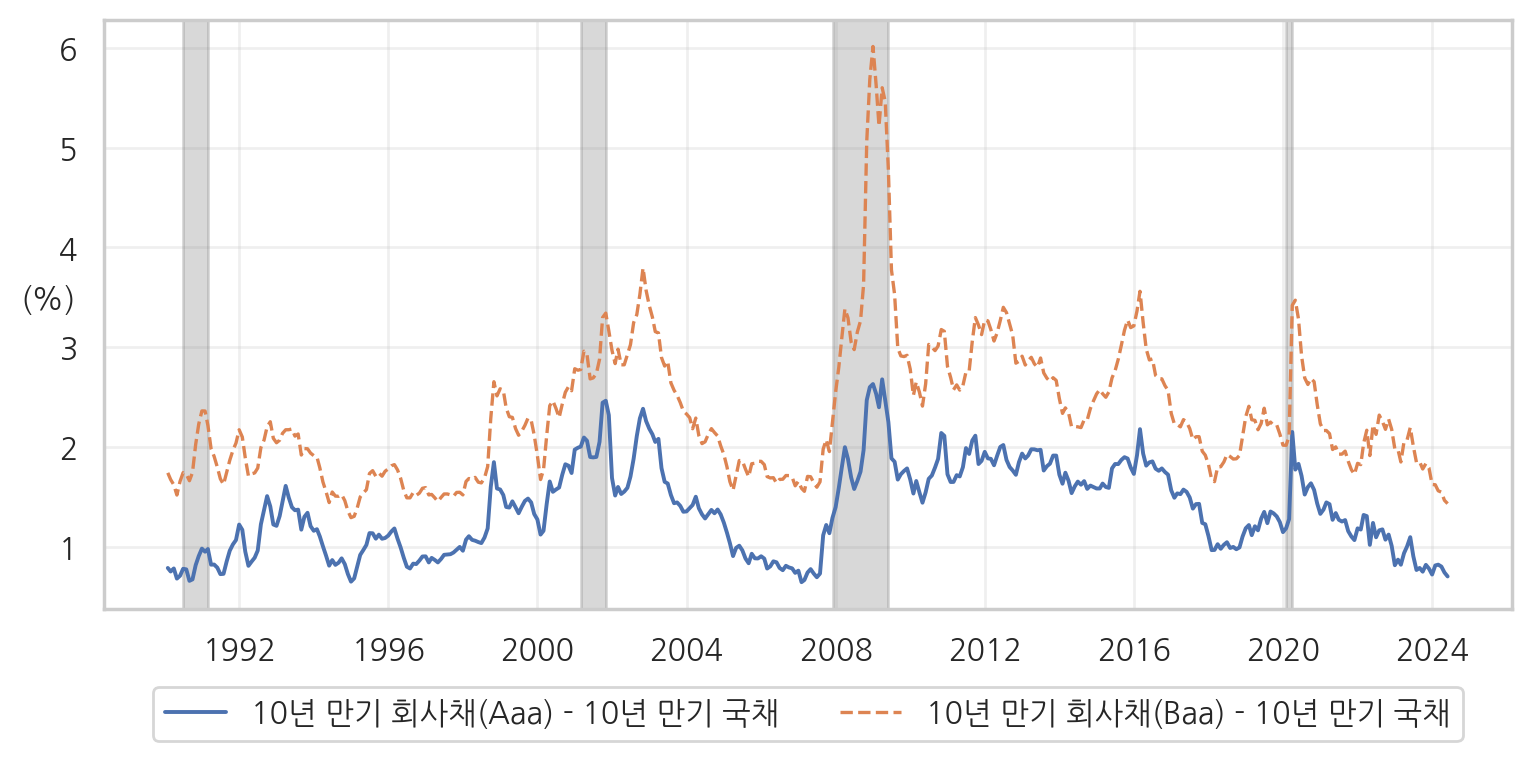

In [30]:
fig, ax = plt.subplots(figsize=(8,4))

# -----------------------------
# Lines
# -----------------------------
ax.plot(spread['AAA10Y'],
        label='10년 만기 회사채(Aaa) - 10년 만기 국채',
        linewidth=1.4)

ax.plot(spread['BAA10Y'],
        label='10년 만기 회사채(Baa) - 10년 만기 국채',
        linestyle='dashed',
        linewidth=1.2)

# -----------------------------
# Recession shading
# -----------------------------
plot_nber_recession(ax, NBERm)

# -----------------------------
# Formatting
# -----------------------------
ax.set_xlabel('')
ax.set_ylabel('(%)', fontsize=11, rotation=0)

ax.legend(loc='lower center',
          bbox_to_anchor=(0.5, -0.25),
          ncol=2,
          fontsize=11)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.0f}')
)

ax.grid(True)
ax.margins(x=0)

save_fig('credit_spread_us')
plt.show()


### 단기 단기화 현상(flight from maturity)

In [31]:
def gen_df_CP(kind, date_range):
    '''
    import and generate dataframe for CP rate by credit ratings
    df: filename
    kind: credit rating (example: 'A1','A2' for A2+,'A3' for A3+)
    date_range: '2001_2301' or '2301_2306'
    '''
    filepath =  "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/CP_"+kind+"_"+date_range+".xls"
    df = pd.read_excel(filepath)

    # remove unncessary parts
    df = df.loc[15:,:]

    # column name: maturity + rating
    colname = ['7d','15d','1m','3m','6m','1y']
    colname_new = [i+'_'+kind for i in colname]

    df.columns = ['ddate', 'kind']+ colname_new
    if date_range=='2001_2301':
        df = df.loc[df['kind']=='민평평균']
        df.drop(['kind'],axis=1,inplace=True)
    else:
        df = df.loc[df['kind']=='4사 평균']
        df.drop(['kind'],axis=1,inplace=True)

    df['ddate'] = pd.to_datetime(df['ddate'],format="%Y-%m-%d")
    df.set_index('ddate',inplace=True)

    return df

In [32]:
df_A1 = gen_df_CP('A1','2001_2301')
df_A1_later = gen_df_CP('A1','2301_2306')
dfA1 = pd.concat([df_A1,df_A1_later],axis=0)

df_A2 = gen_df_CP('A2','2001_2301')
df_A2_later = gen_df_CP('A2','2301_2306')
dfA2 = pd.concat([df_A2,df_A2_later],axis=0)

df_A3 = gen_df_CP('A3','2001_2301')
df_A3_later = gen_df_CP('A3','2301_2306')
dfA3 = pd.concat([df_A3,df_A3_later],axis=0)

CPrate = pd.concat([dfA1,dfA2,dfA3],axis=1)
CPrate.head(3)

,7d_A1,15d_A1,1m_A1,3m_A1,6m_A1,...,15d_A3,1m_A3,3m_A3,6m_A3,1y_A3
ddate,,,,,,,,,,,
2020-01-02,1.56,1.64,1.71,1.75,1.78,...,3.21,3.35,3.56,3.62,3.72
2020-01-03,1.54,1.62,1.67,1.71,1.75,...,3.19,3.32,3.52,3.60,3.69
2020-01-06,1.51,1.58,1.63,1.68,1.73,...,3.17,3.30,3.51,3.59,3.69


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/flight_maturity.png


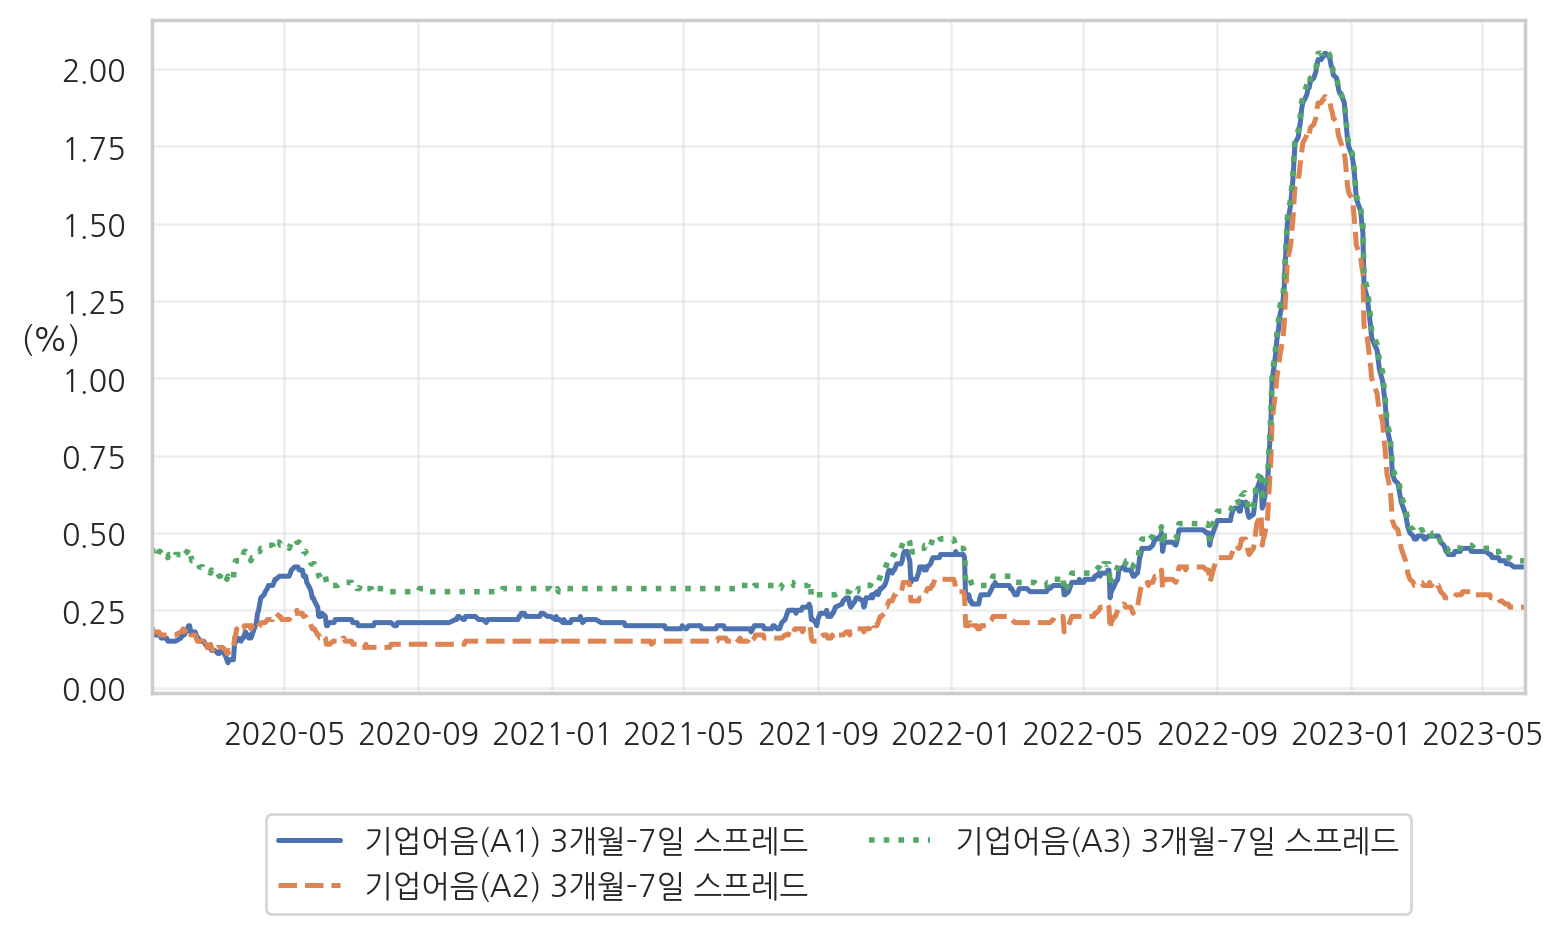

In [33]:
spread = pd.DataFrame(index=CPrate.index)
spread['A1'] = CPrate['3m_A1'] - CPrate['7d_A1']
spread['A2'] = CPrate['3m_A2'] - CPrate['7d_A2']
spread['A3'] = CPrate['3m_A3'] - CPrate['7d_A3']

# -----------------------------
# (3) 그림 범위 설정
# -----------------------------
start_date = '2020-01-01'
end_date   = '2023-06-30'
spread_plot = spread.loc[start_date:end_date].copy()

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(spread_plot.index, spread_plot['A1'],
        label='기업어음(A1) 3개월–7일 스프레드',
        linewidth=1.8)

ax.plot(spread_plot.index, spread_plot['A2'],
        label='기업어음(A2) 3개월–7일 스프레드',
        linestyle='--', linewidth=1.8)

ax.plot(spread_plot.index, spread_plot['A3'],
        label='기업어음(A3) 3개월–7일 스프레드',
        linestyle=':', linewidth=2.0)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
ax.grid(True)
ax.margins(x=0)

# 범례: 그림처럼 아래쪽
ax.legend(fontsize=11, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)

save_fig('flight_maturity')  # 원하시는 파일명으로 바꾸셔도 됩니다
plt.show()

## 국채와 TIPS 간 수익률 차이

In [34]:
# 10-Year Treasury Constant Maturity Rate = DGS10
# 10-Year Treasury Inflation-Indexed Security, Constant Maturity = DFI10

var_list = ['DGS10','DFII10']
start = date(2003,1,1)
end = date(2024,5,1)

df = pdr.get_data_fred(var_list, start=start, end=end)

df.columns = ['T10','TIPS10']

# change the daily frequency into monthly
df = df.resample('M').mean()

# get the difference
df['ExpInf'] = df['T10'] - df['TIPS10']
print(df.head(2))
print(df.tail(2))
print(df['ExpInf'].mean())

            T10  TIPS10  ExpInf
DATE                           
2003-01-31 4.05    2.29    1.75
2003-02-28 3.90    1.99    1.91
            T10  TIPS10  ExpInf
DATE                           
2024-04-30 4.54    2.15    2.39
2024-05-31 4.63    2.25    2.38
2.087836383006752


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/TIPS.png


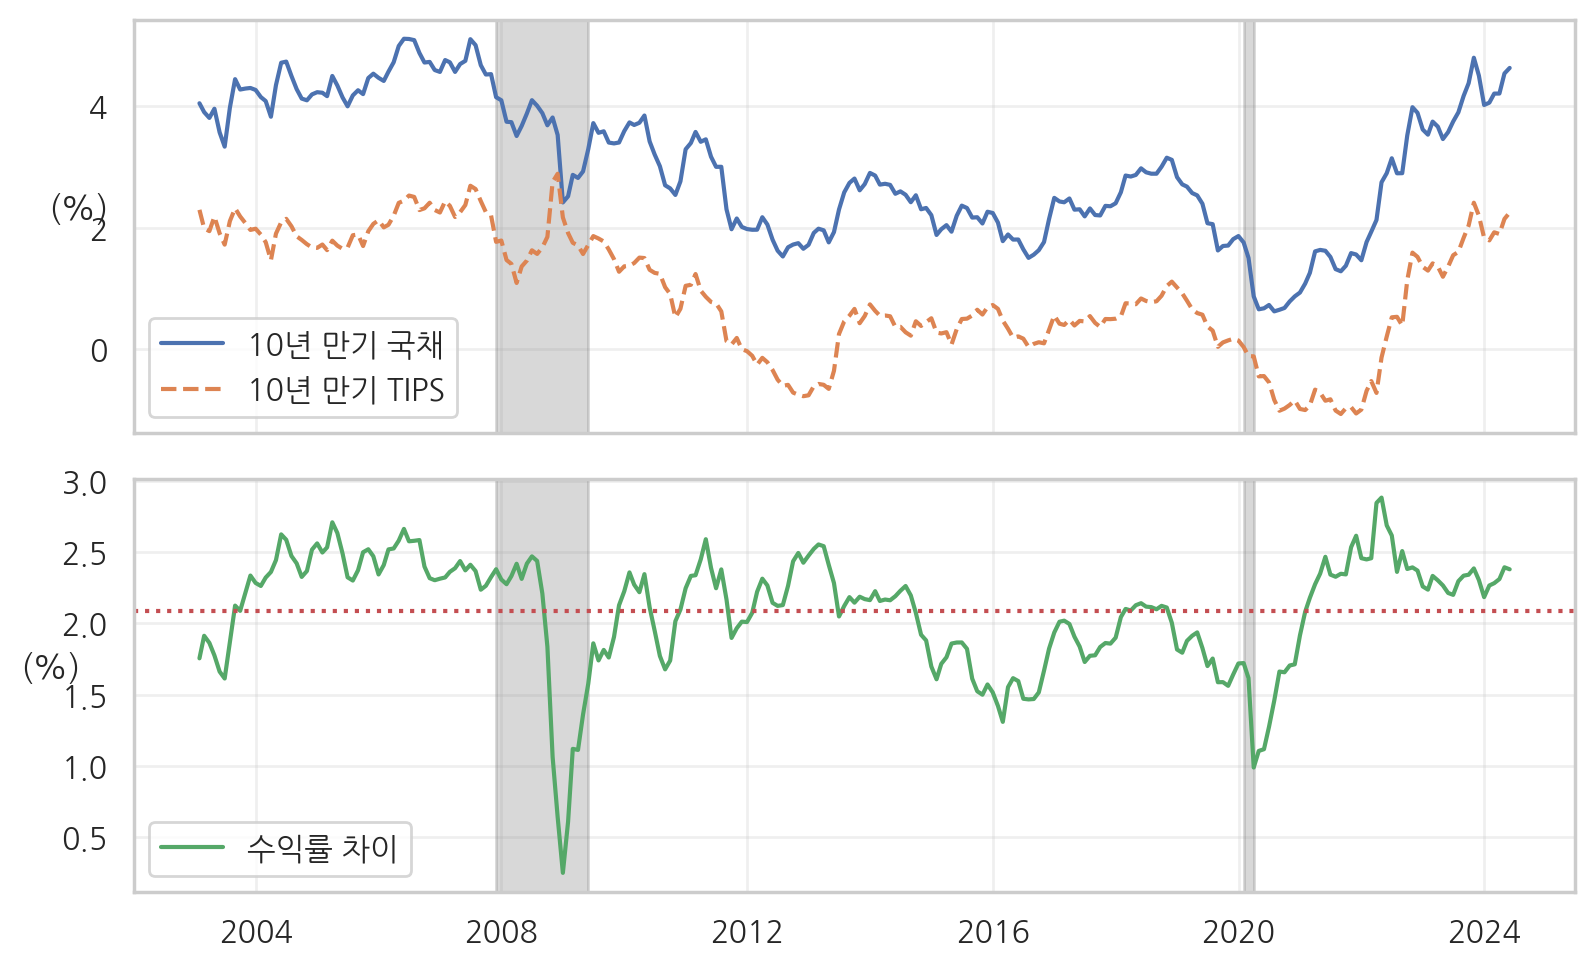

In [35]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8, 5))

ax1.plot(df['T10'], label='10년 만기 국채')
ax1.plot(df['TIPS10'], label='10년 만기 TIPS', linestyle='dashed')
ax1.set_ylabel("(%)", rotation=0)
ax1.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
ax1.axvspan('2020-02','2020-04', alpha=0.3, color='grey')
ax1.legend()

ax2.plot(df['ExpInf'], label='수익률 차이', color='g')
ax2.set_ylabel("(%)", rotation=0)
ax2.axhline(y=df['ExpInf'].mean(), color='r', linestyle='dotted')
ax2.axvspan('2007-12','2009-06', alpha=0.3, color='grey')
ax2.axvspan('2020-02','2020-04', alpha=0.3, color='grey')
ax2.legend()

save_fig('TIPS')

plt.show()

## 연습문제
### 신용 스프레드 추이: 우리나라의 경우

In [36]:
# API key
key_api = key_api_ECOS
service_key = key_api
api = Ecos(service_key)

In [37]:
date_start = '20070101'
date_end = '20230531'

df_main = api.get_statistic_search(통계표코드="817Y002", 주기="D",
          검색시작일자=date_start, 검색종료일자=date_end)
df_main.head()

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
0,817Y002,1.3.2.1. 시장금리(일별),010101000,"콜금리(1일, 전체거래)",None,...,None,연%,None,20070102,4.54
1,817Y002,1.3.2.1. 시장금리(일별),010102000,"콜금리(1일, 중개회사거래)",None,...,None,연%,None,20070102,4.54
2,817Y002,1.3.2.1. 시장금리(일별),010150000,KORIBOR(3개월),None,...,None,연%,None,20070102,4.85
3,817Y002,1.3.2.1. 시장금리(일별),010151000,KORIBOR(6개월),None,...,None,연%,None,20070102,4.95
4,817Y002,1.3.2.1. 시장금리(일별),010152000,KORIBOR(12개월),None,...,None,연%,None,20070102,5.02


In [38]:
df = df_main.copy()
df['통계항목명1'].value_counts()

,count
통계항목명1,
"회사채(3년, AA-, 민평)",4075
CMA(수시형),4074
"콜금리(1일, 전체거래)",4073
KORIBOR(6개월),4073
KORIBOR(12개월),4073
국고채(1년),4073
국고채(3년),4073
국고채(5년),4073
국고채(10년),4073


In [39]:
def generate_TS(df, varlist):
    '''
    ECOS에서 불러 온 이자율 df에서 원하는 이자율만 df로 만들기
    df: api.get_statistic_search로 불러온 df
    varlist: 원하는 변수 리스트 (예: ['CP(91일)', '국고채(3년)'])
    '''
    df = df.loc[df['통계항목명1'].isin(varlist)]
    df = df.loc[:,['통계항목명1','시점','값']]

    df['시점'] = pd.to_datetime(df['시점'], format='%Y%m%d', errors='coerce')
    df.sort_values(by=['통계항목명1','시점'])
    df = pd.pivot(df, index='시점', columns='통계항목명1', values='값')
    df.index.to_period('d')

    df = df.astype(float)
    df.index.names = ['mdate']

    return df

In [40]:
df2 = generate_TS(df, df['통계항목명1'].value_counts().index.tolist())
df2.head(3)

통계항목명1,CD(91일),CMA(수시형),CP(91일),KOFR(공시RFR),KORIBOR(12개월),...,통안증권(2년),통안증권(91일),"회사채(3년, AA-)","회사채(3년, AA-, 민평)","회사채(3년, BBB-)"
mdate,,,,,,,,,,,
2007-01-02,4.87,4.43,5.04,NaN,5.02,...,5.00,4.72,5.30,5.18,8.09
2007-01-03,4.87,4.44,5.04,NaN,5.02,...,4.97,4.72,5.27,5.16,8.06
2007-01-04,4.87,4.44,5.04,NaN,5.02,...,4.97,4.72,5.28,5.16,8.07


In [41]:
# 한국은행 기준금리 불러오고 데이터 결합

df_policyrate = api.get_statistic_search(통계표코드="722Y001", 주기="D", 검색시작일자=date_start, 검색종료일자=date_end)
df_policyrate = generate_TS(df_policyrate,['한국은행 기준금리'])

df_all = pd.concat([df_policyrate, df2], axis=1, join='inner')

In [42]:
# df_all dataframe에 변수 추가
df_all['credit_spread1'] = df_all['회사채(3년, AA-)']-df_all['국고채(3년)']
df_all['credit_spread2'] = df_all['회사채(3년, BBB-)']-df_all['국고채(3년)']
df_all['credit_spread3'] = df_all['회사채(3년, BBB-)']-df_all['회사채(3년, AA-)']

df_all['CP_spread1'] = df_all['CP(91일)']-df_all['CD(91일)']
df_all['CP_spread2'] = df_all['CP(91일)']-df_all['통안증권(91일)']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/credit_spread_kor.png


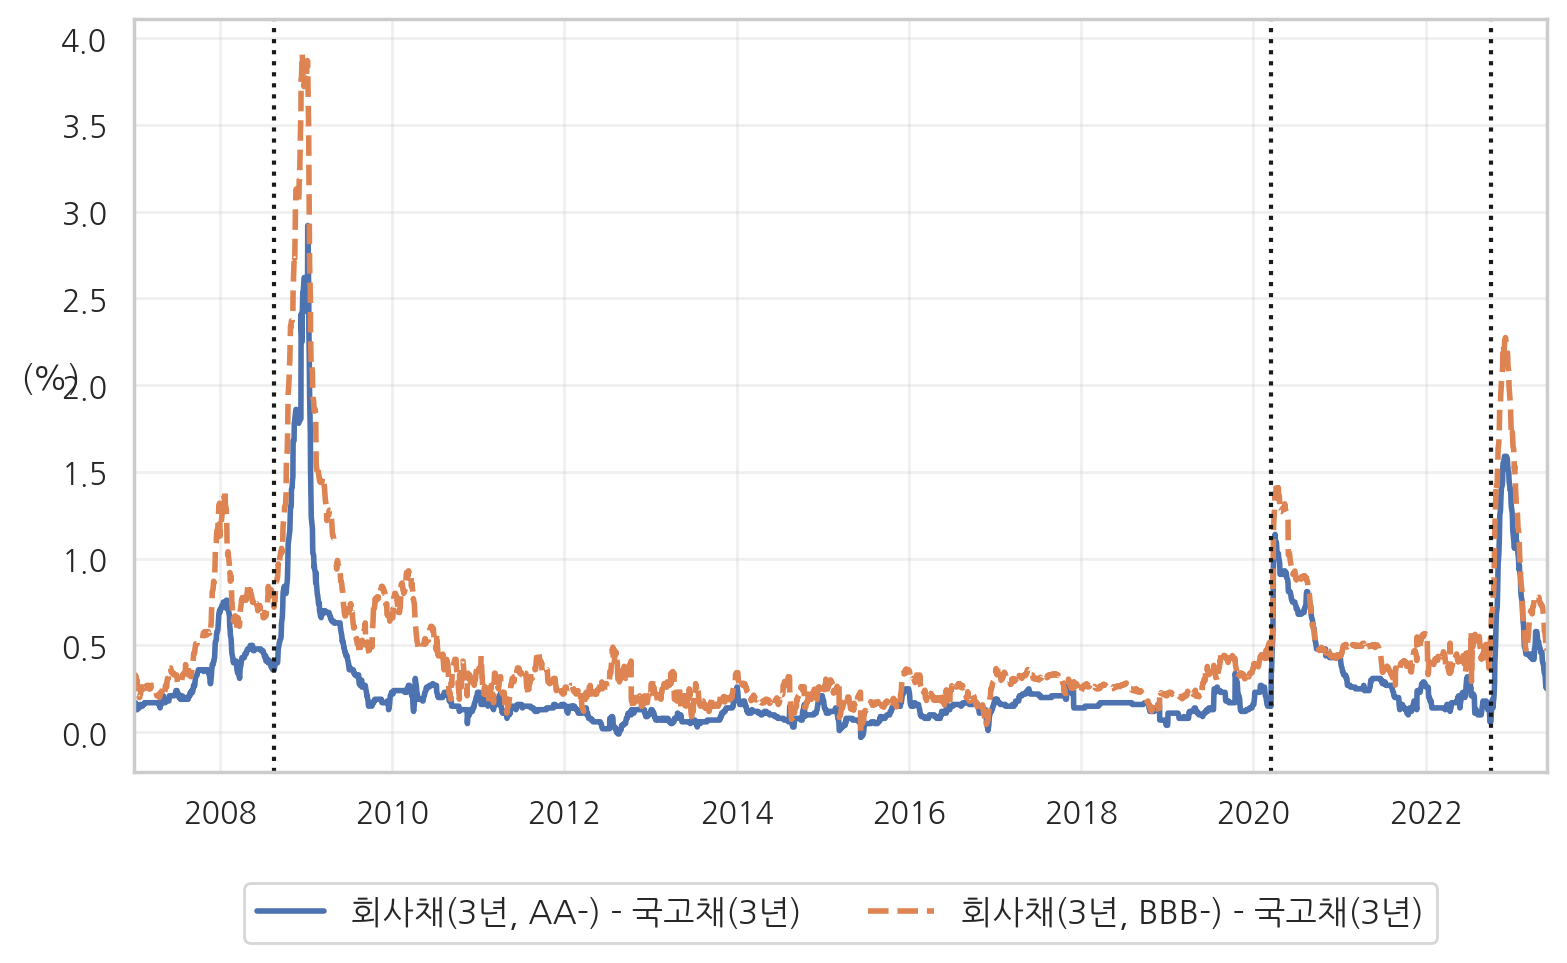

In [44]:
fig, ax = plt.subplots(figsize=(8,5))

# -----------------------------
# Lines
# -----------------------------
ax.plot(df_all.index, df_all['CP_spread1'],
        label='회사채(3년, AA-) - 국고채(3년)',
        linewidth=2.0)

ax.plot(df_all.index, df_all['CP_spread2'],
        label='회사채(3년, BBB-) - 국고채(3년)',
        linestyle='--', linewidth=2.0)

# -----------------------------
# Event vertical lines
# -----------------------------
event_dates = ['2008-08-18', '2020-03-16', '2022-10-05']

for d in event_dates:
    ax.axvline(pd.Timestamp(d),
               color='k', linestyle=':', linewidth=1.5)

# -----------------------------
# Formatting
# -----------------------------
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.legend(fontsize=12,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.25),
          ncol=2)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.1f}')
)

ax.grid(True)
ax.margins(x=0)

save_fig('credit_spread_kor')
plt.show()
